# Configuración inicial

* En este notebook vamos a descargar el dataset `book` que contiene muchos libros en ingles en formato de texto tokenizado, de los cuales vamos a hacer procesamiento.

In [1]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/luis/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /home/luis/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /home/luis/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/luis/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/luis/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/luis/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /home/luis/nltk_data..

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Analizando un texto

In [2]:
# escogemos text1 que es el famoso libro Moby Dick
text1


<Text: Moby Dick by Herman Melville 1851>

In [3]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [4]:
len(text1)

260819

## Medida de riqueza lexica en un texto: 
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

In [5]:
# Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)
# https://docs.python.org/2/library/sets.html

# el voculario es la lista de palabras unicas de un lenguaje

vocabulario = list(set(text1))
vocabulario[1000:1050]


['bowsprit',
 'ASIDE',
 'curly',
 'heron',
 'bleeds',
 'cabalistically',
 'chariot',
 'soar',
 'LAMB',
 'degree',
 'pile',
 'Harris',
 'browsing',
 'discourse',
 'came',
 ",'--",
 'shelf',
 'cooper',
 'crawling',
 'curses',
 'Raising',
 'afire',
 'floods',
 'softest',
 'ripe',
 'Near',
 'inaccessible',
 'revels',
 'golden',
 'wallow',
 'platform',
 'Which',
 'drugging',
 'loves',
 'twilight',
 'allurements',
 'ornament',
 'relieved',
 'clustering',
 'evaporate',
 'ached',
 'loath',
 'visitation',
 'stringy',
 'BLOOD',
 'counterfeit',
 'pestilent',
 'piles',
 'Hydrus',
 'Reckon']

In [6]:
vocabulario = sorted(set(text1))
vocabulario[1000:1050]


['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts',
 'Cruelty',
 'Cruising',
 'Cruppered',
 'Crusaders',
 'Crushed',
 'Crying',
 'Cuba',
 'Curious',
 'Curse',
 'Cursed',
 'Curses',
 'Cussed',
 'Customs',
 'Cut',
 'Cutter',
 'Cutting',
 'Cuvier',
 'Cyclades',
 'Czar',
 'D',
 'DAGGOO',
 'DAM',
 'DANCE',
 'DANCING',
 'DANIEL',
 'DANISH',
 'DARKENS',
 'DARWIN',
 'DAVENANT',
 'DEAD',
 'DEATH',
 'DEBELL',
 'DECK',
 'DEL',
 'DESTROYED',
 'DEVIL',
 'DICTIONARY',
 'DID',
 'DIGNITY',
 'DISCOVERS']

In [7]:
rl = len(vocabulario) / len(text1)
rl

0.07406285585022564

In [8]:
len(set(text1))

19317

In [9]:
def lexical_richness(text):
    return len(set(text)) / len(text)

In [10]:
lexical_richness(text1)


0.07406285585022564

In [11]:
lexical_richness(text2)


0.04826383002768831

In [12]:
def word_percentage(word, text):
    return 100 * text.count(word) / len(text)

In [13]:
word_percentage('monster', text1)


0.018786974875296663

In [14]:
word_percentage('the', text1)


5.260736372733581

In [15]:
text1.count('monster')


49

In [16]:
text1.count('the')


13721

# Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`


In [17]:
# calculando una distribución de frecuencias de palabras
wordMap = {}
# este metodo no es recomendado ya que toma mucho tiempo en ejecutarse
# son mas de 260 mil palabras
for palabra in set(text1):
  wordMap[palabra] = text1.count(palabra)

wordMap

{'elapsed': 4,
 'crackers': 1,
 'Johnson': 3,
 'whooping': 1,
 'Cabin': 3,
 'massive': 5,
 'vigorous': 9,
 'shudder': 6,
 'Small': 2,
 'create': 1,
 '):': 1,
 'wakeful': 2,
 'zone': 5,
 'tiles': 3,
 'acquiesce': 1,
 'beginner': 1,
 'devoting': 1,
 'convince': 1,
 'pumping': 2,
 'undressed': 3,
 'coronations': 1,
 'symbolizings': 1,
 'nobly': 2,
 'Bless': 1,
 'bulls': 3,
 'jam': 2,
 'shipwrecks': 1,
 'Up': 15,
 'Blocksburg': 1,
 'Darien': 1,
 'ferule': 2,
 'interfusing': 1,
 'paralysed': 1,
 'LEG': 1,
 'amain': 1,
 'Baltic': 3,
 'blazing': 7,
 'posies': 1,
 '31': 1,
 'kannakin': 1,
 'Try': 5,
 'retentive': 1,
 'gestures': 4,
 'suspicions': 5,
 'underwriter': 1,
 'beseech': 1,
 'flourishin': 1,
 'vivid': 9,
 'clever': 1,
 'servile': 1,
 'Harmattans': 1,
 'near': 69,
 'Loftiest': 1,
 '1': 2,
 'luff': 1,
 'civility': 1,
 'breezy': 1,
 'ewer': 1,
 'Lowering': 1,
 'site': 2,
 'heartily': 4,
 'genus': 1,
 'required': 2,
 'admire': 3,
 'VESSEL': 1,
 'believed': 6,
 'bethink': 6,
 'martial': 2,

## Método FreqDist de NLTK

In [18]:
fdist = FreqDist(text1)
fdist

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

In [19]:
fdist.most_common()


[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624),
 ('The', 612),
 ('their', 612),
 ('are', 586),
 ('they', 586),
 ('an', 582),
 ('some', 578),
 ('then', 571),
 ('my', 564),
 ('when', 553),
 ('upon', 538),
 ('out', 529),
 ('into', 520),
 ('man', 508),
 ('ship', 507),
 ('up', 505),
 ('mor

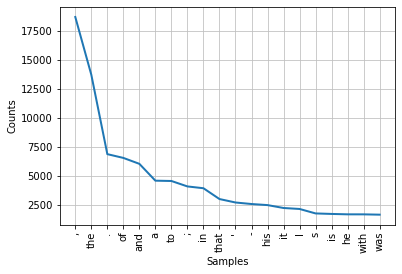

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
fdist.plot(20)

In [21]:
fdist['monster']

49

## Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo. 
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [22]:

"""
crea un arregle de cada palabra
y agrega las palabras al arreglo solo
si su longitud es mayor a 5
de esta forma 
"""
long_words = [palabra for palabra in text1 if len(palabra) > 5]
long_words


['Herman',
 'Melville',
 'ETYMOLOGY',
 'Supplied',
 'Consumptive',
 'Grammar',
 'School',
 'threadbare',
 'dusting',
 'lexicons',
 'grammars',
 'handkerchief',
 'mockingly',
 'embellished',
 'nations',
 'grammars',
 'somehow',
 'mildly',
 'reminded',
 'mortality',
 'school',
 'others',
 'called',
 'tongue',
 'leaving',
 'through',
 'ignorance',
 'letter',
 'almost',
 'maketh',
 'signification',
 'deliver',
 'HACKLUYT',
 'animal',
 'roundness',
 'rolling',
 'arched',
 'vaulted',
 'WEBSTER',
 'DICTIONARY',
 'immediately',
 'WALLEN',
 'wallow',
 'RICHARDSON',
 'DICTIONARY',
 'DANISH',
 'SWEDISH',
 'ICELANDIC',
 'ENGLISH',
 'BALEINE',
 'FRENCH',
 'BALLENA',
 'SPANISH',
 'ERROMANGOAN',
 'EXTRACTS',
 'Supplied',
 'Librarian',
 'painstaking',
 'burrower',
 'appears',
 'through',
 'Vaticans',
 'street',
 'stalls',
 'picking',
 'whatever',
 'random',
 'allusions',
 'whales',
 'anyways',
 'whatsoever',
 'sacred',
 'profane',
 'Therefore',
 'higgledy',
 'piggledy',
 'statements',
 'however',
 'au

In [23]:
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado


['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA',
 'ANCHORS',
 'ANIMAL',
 'ANNALS',
 'ANOTHER',
 'APOLOGY',
 'APPLICATION',
 'APPROACHING',
 'ARCTIC',
 'AROUND',
 'ASCENDING',
 'ASPECT',
 'ATTACK',
 'ATTACKED',
 'ATTITUDES',
 'AUGUST',
 'AUTHOR',
 'Abashed',
 'Abednego',
 'Abjectus',
 'Aboard',
 'Abominable',
 'Abraham',
 'Academy',
 'Accessory',
 'According',
 'Accordingly',
 'Accursed',
 'Achilles',
 'Actium',
 'Acushnet',
 'Admiral',
 'Admirals',
 'Advance',
 'Advancement',
 'Adventures',
 'Adverse',
 'Advocate',
 'Affected',
 'Affidavit',
 'Affrighted',
 'Africa',
 'African',
 'Africans',
 'Afterwards',
 'Against',
 'Agassiz',
 'Ahasuerus',
 'Alabama',
 'Aladdin',
 'Alarmed',
 'Albatross',
 'Albemarle',
 'Albert',
 'Albicore',
 'Albino',
 'Aldrovandi',
 'Aldrovandus',
 'Alexander',
 'Alexanders',
 'Alfred',
 'Algerine',
 'Algiers',
 'Alleghanian',
 'Alleghanies',
 'Almanack',
 'Almighty',
 'Almost',
 

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [34]:
"""
Notas de estudiante

Para lo de quitar las palabras que no generan valor yo suelo usar librerías que contienen listas de stopwords, dado que siento que haciéndolo por la longitud de la palabra igual podríamos estar perdiendo datos útiles
"""


from nltk.corpus import stopwords


stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
useless_words = ['i', 'esporadic']

some = [palabra for palabra in useless_words if palabra not in stopwords.words(
    'english')]

some


['esporadic']

In [53]:
palabras_interesantes = [
  (palabra, fdist[palabra]) for palabra in set(text1) if len(palabra) > 5 and fdist[palabra] > 10
]
# palabras_interesantes


In [54]:
# usando stop words
# palabras_interesantes = [
#     (palabra, fdist[palabra]) for palabra in set(text1) if palabra not in stopwords.words('english') and len(palabra) > 3
# ]
# palabras_interesantes


In [55]:
dtypes = [('word', 'S10'), ('frecuency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_interesantes


array([(b'before', 293), (b'doubloon',  17), (b'business',  67),
       (b'somewhat',  27), (b'murmured',  12), (b'curious',  53),
       (b'pictures',  13), (b'carried',  30), (b'mortal',  39),
       (b'lesson',  12), (b'narrow',  12), (b'floats',  11),
       (b'carved',  14), (b'having',  62), (b'immense',  15),
       (b'capture',  14), (b'wholly',  27), (b'naturalist',  11),
       (b'otherwise',  26), (b'started',  26), (b'father',  16),
       (b'oarsman',  15), (b'tackle',  11), (b'believe',  25),
       (b'thereby',  15), (b'monster',  49), (b'instance',  18),
       (b'effect',  15), (b'watching',  15), (b'towing',  14),
       (b'immediatel',  14), (b'plenty',  16), (b'animal',  16),
       (b'people',  42), (b'thirty',  26), (b'coward',  15),
       (b'future',  14), (b'aspect',  36), (b'concerning',  38),
       (b'previously',  17), (b'bottom',  52), (b'degree',  26),
       (b'golden',  18), (b'officer',  15), (b'flukes',  36),
       (b'meanwhile',  12), (b'inserted', 

In [56]:
palabras_interesantes = np.sort(palabras_interesantes, order='frecuency')
palabras_interesantes


array([(b'America',  11), (b'Father',  11), (b'Fleece',  11),
       (b'Guernsey',  11), (b'Heaven',  11), (b'NANTUCKET',  11),
       (b'Perseus',  11), (b'Ramadan',  11), (b'Therefore',  11),
       (b'additional',  11), (b'advanced',  11), (b'appearance',  11),
       (b'baleen',  11), (b'barbaric',  11), (b'beating',  11),
       (b'begins',  11), (b'beholding',  11), (b'belong',  11),
       (b'blackness',  11), (b'blanket',  11), (b'blessed',  11),
       (b'butter',  11), (b'central',  11), (b'clothes',  11),
       (b'coiled',  11), (b'commotion',  11), (b'concluding',  11),
       (b'contact',  11), (b'convenient',  11), (b'covered',  11),
       (b'cursed',  11), (b'demanded',  11), (b'desired',  11),
       (b'direct',  11), (b'element',  11), (b'elevated',  11),
       (b'elsewhere',  11), (b'excellent',  11), (b'experience',  11),
       (b'fashion',  11), (b'fashioned',  11), (b'fastened',  11),
       (b'features',  11), (b'fellows',  11), (b'fierce',  11),
       (b'fif

In [57]:
# Construccion de un grafico de barras customizado con Matplotlib
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py
palabras_interesantes[-4:]


array([(b'Queequeg', 252), (b'seemed', 283), (b'before', 293),
       (b'though', 335)], dtype=[('word', 'S10'), ('frecuency', '<i8')])

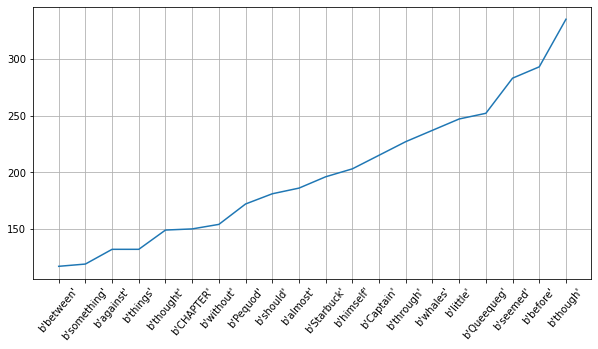

In [65]:
top_words = 20

x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation=50)
plt.grid(True)
plt.show()